In [1]:
# loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the datasets

loan_df = pd.read_csv('kiva_loan.csv')
region_df = pd.read_csv('kiva_mpi_region_locations.csv')
loan_id = pd.read_csv('loan_theme_id.csv')
loan_theme_by_region = pd.read_csv('loan_themes_by_reg.csv')

In [3]:
# Merging datasets

loan_df = loan_df.merge(loan_id, on='id', how='left')


In [4]:
# Viewing the shape of the data

data_frames = {
    'loan_df': loan_df,
    'region_df': region_df,
    'loan_theme_by_region': loan_theme_by_region
}

for name, item in data_frames.items():
    print (f"Dataset name: {name}")
    print('shape: ', item.shape)
    print('\n')


Dataset name: loan_df
shape:  (671205, 23)


Dataset name: region_df
shape:  (2772, 9)


Dataset name: loan_theme_by_region
shape:  (15736, 21)




In [5]:
# viewing basic info

for name, item in data_frames.items():
    print (f"Dataset name: {name}")
    print('shape: ', item.info())
    print('\n')

Dataset name: loan_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count

>> There are quite a number of nulls, and also data types will have to be changed in order to have comprehensible dataset for analysis

## <span style="color:orange">1. Data Cleaning</span>


In [6]:
# checking for Duplicated values

for name, item in data_frames.items():
    print (f"Dataset name: {name}")
    print('No of Duplicates: ', item.duplicated().sum())
    print('\n')


Dataset name: loan_df
No of Duplicates:  0


Dataset name: region_df
No of Duplicates:  1763


Dataset name: loan_theme_by_region
No of Duplicates:  0




>> Lets confirm the duplicates on the region_df

In [7]:
region_df[region_df.duplicated(keep=False)]

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
1008,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1009,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1010,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1011,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1012,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
...,...,...,...,...,...,...,...,...,...
2767,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2768,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2769,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2770,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN


>> it seems that the duplicate values are NaN values and geo, these can be dropped

In [8]:
region_df.drop_duplicates(keep=False, inplace=True)
region_df.duplicated().sum()

0

In [9]:
# Now check for missing values

for name, item in data_frames.items():
    print (f"Dataset name: {name}")
    print('No of Missing values: ', item.isna().sum().sum())
    print('\n')

Dataset name: loan_df
No of Missing values:  341450


Dataset name: region_df
No of Missing values:  304


Dataset name: loan_theme_by_region
No of Missing values:  30318




>> We will deal the NaNs dataset per dataset

In [10]:
# Loan df

loan_df.isna().sum() / len(loan_df) * 100

id                     0.000000
funded_amount          0.000000
loan_amount            0.000000
activity               0.000000
sector                 0.000000
use                    0.630508
country_code           0.001192
country                0.000000
region                 8.462392
currency               0.000000
partner_id             2.012351
posted_time            0.000000
disbursed_time         0.356970
funded_time            7.200632
term_in_months         0.000000
lender_count           0.000000
tags                  25.538546
borrower_genders       0.628869
repayment_interval     0.000000
date                   0.000000
Loan Theme ID          2.013245
Loan Theme Type        2.013245
Partner ID             2.013245
dtype: float64

>> The Tags column contains 25% missing data, and it will be excluded from our demographic analysis as it does not contribute to the analysis.

>> After thorough evaluation, Loan Theme ID, Loan Theme Type, and Partner ID will be excluded from our demographic analysis. These columns are adequately represented by other more complete columns, such as sector, where Loan Theme Type and Loan Theme ID are implicitly captured.

In [11]:
columns_to_drop  =  ['Partner ID','Loan Theme ID', 'Loan Theme Type', 'tags', ]

loan_df.drop(columns=columns_to_drop, axis= 1, inplace= True)

loan_df.isna().sum() / len(loan_df) * 100

id                    0.000000
funded_amount         0.000000
loan_amount           0.000000
activity              0.000000
sector                0.000000
use                   0.630508
country_code          0.001192
country               0.000000
region                8.462392
currency              0.000000
partner_id            2.012351
posted_time           0.000000
disbursed_time        0.356970
funded_time           7.200632
term_in_months        0.000000
lender_count          0.000000
borrower_genders      0.628869
repayment_interval    0.000000
date                  0.000000
dtype: float64

>> For the remainder we will drop only rows with missing values

In [12]:

loan_df= loan_df.dropna(how='any', axis=0)
loan_df.isna().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

`Changing the data types of my date time columns`

In [13]:
loan_df[['posted_time', 'disbursed_time', 'funded_time','term_in_months', 'date' ]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 574115 entries, 0 to 671186
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   posted_time     574115 non-null  object 
 1   disbursed_time  574115 non-null  object 
 2   funded_time     574115 non-null  object 
 3   term_in_months  574115 non-null  float64
 4   date            574115 non-null  object 
dtypes: float64(1), object(4)
memory usage: 26.3+ MB


In [14]:
# List of columns to convert to datetime format
to_date = ['posted_time', 'disbursed_time', 'funded_time', 'date']

for item in to_date:
    loan_df[item] = pd.to_datetime(loan_df[item])

for item in to_date:
    loan_df[item] = loan_df[item].dt.strftime('%Y-%m')

C:\Users\Hp\AppData\Local\Temp\ipykernel_15296\1585578637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df[item] = pd.to_datetime(loan_df[item])
C:\Users\Hp\AppData\Local\Temp\ipykernel_15296\1585578637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df[item] = pd.to_datetime(loan_df[item])
C:\Users\Hp\AppData\Local\Temp\ipykernel_15296\1585578637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [15]:
loan_df[['posted_time', 'disbursed_time', 'funded_time','term_in_months', 'date' ]].head()

,posted_time,disbursed_time,funded_time,term_in_months,date
0,2014-01,2013-12,2014-01,12.0,2014-01
1,2014-01,2013-12,2014-01,11.0,2014-01
2,2014-01,2013-12,2014-01,43.0,2014-01
3,2014-01,2013-12,2014-01,11.0,2014-01
4,2014-01,2013-12,2014-01,14.0,2014-01


In [16]:
# correcting errors in some of our object columns

loan_df['borrower_genders'].value_counts()

borrower_genders
female                                                                                                                                                                                                                                                                                                          377744
male                                                                                                                                                                                                                                                                                                            103365
female, female                                                                                                                                                                                                                                                                                                   11410
female, female, female                            

In [17]:
# Replacing multiple occurrences of 'female' or 'male' with a single occurrence using regular expressions 

loan_df['borrower_genders']= loan_df['borrower_genders'].str.replace(r',.*', '', regex=True)

loan_df['borrower_genders'].value_counts()

C:\Users\Hp\AppData\Local\Temp\ipykernel_15296\4095884749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['borrower_genders']= loan_df['borrower_genders'].str.replace(r',.*', '', regex=True)


borrower_genders
female    454928
male      119187
Name: count, dtype: int64

In [18]:
# region df

region_df.isna().sum() / len(region_df) * 100

LocationName     2.380952
ISO              0.000000
country          0.000000
region           2.380952
world_region     0.000000
MPI              2.380952
geo              0.000000
lat             11.507937
lon             11.507937
dtype: float64

In [19]:
# Dropping nulls

region_df= region_df.dropna(how='any', axis=0)


## <span style="color:orange">2. EDA / STATISTICAL ANALYSIS</span>


`GENDER ANALYSIS`

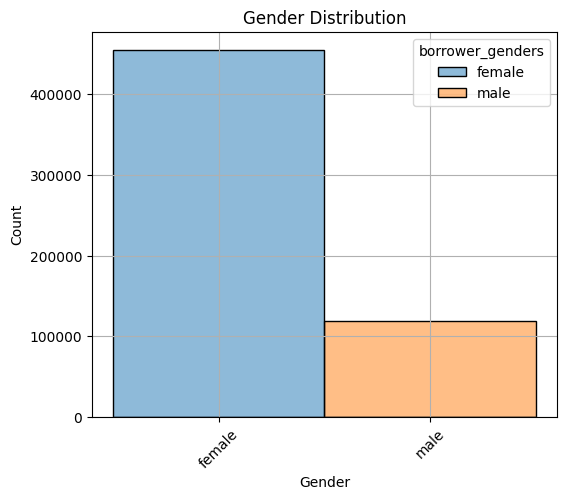

In [21]:
plt.figure(figsize=(6, 5))
sns.histplot(data=loan_df, x="borrower_genders", hue="borrower_genders")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

>> Female borrowers more than Males

In [22]:
from statsmodels.stats.weightstats import ztest

male_funded_amount = loan_df[loan_df['borrower_genders'] == 'male']['funded_amount']
female_funded_amount = loan_df[loan_df['borrower_genders'] == 'female']['funded_amount']

# Perform Z-test
z_stat, p_value = ztest(male_funded_amount, female_funded_amount, alternative='two-sided')

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in funded amounts between genders. Reject the null hypothesis.")
else:
    print("There is not enough evidence to reject the null hypothesis.")


Z-statistic: 31.82524738447343
P-value: 2.896980366299931e-222
There is a statistically significant difference in funded amounts between genders. Reject the null hypothesis.


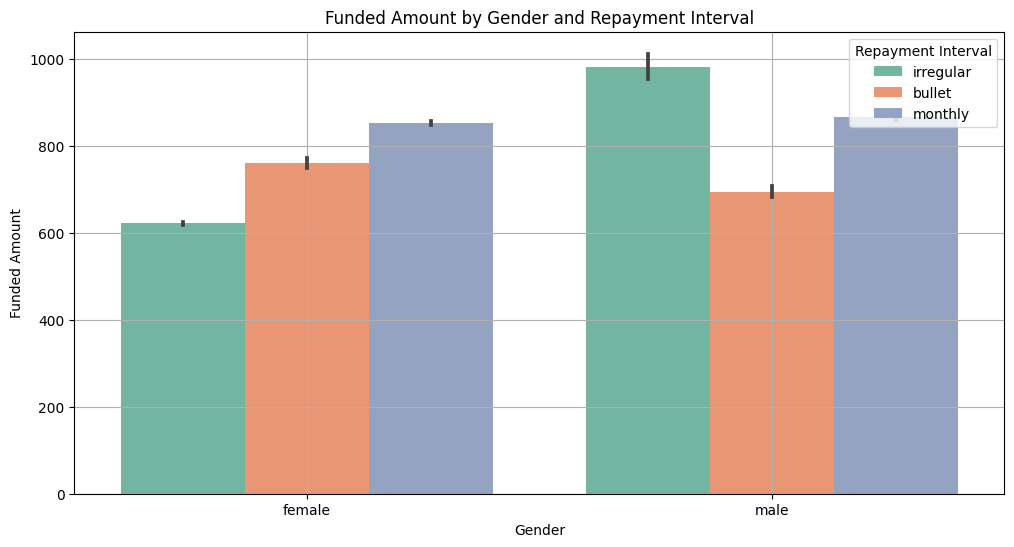

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=loan_df, x="borrower_genders", y="funded_amount", hue="repayment_interval", palette="Set2")
plt.title("Funded Amount by Gender and Repayment Interval")
plt.xlabel("Gender")
plt.ylabel("Funded Amount")
plt.legend(title="Repayment Interval", loc="upper right")
plt.grid(True)
plt.show()

In [24]:
from scipy.stats import f_oneway

# Perform two-way ANOVA
anova_results = loan_df.groupby(['borrower_genders', 'repayment_interval'])['funded_amount'].apply(list).apply(pd.Series).T
anova_test = f_oneway(*[anova_results[gender][repayment_interval].dropna() for gender in anova_results.columns.levels[0] for repayment_interval in anova_results.columns.levels[1]])

# Print the results
print("ANOVA Results:")
print(anova_test)

alpha = 0.05
if anova_test.pvalue < alpha:
    print("\nThere is a statistically significant difference in funded amounts between genders and repayment intervals. Reject the null hypothesis.")
else:
    print("\nThere is not enough evidence to reject the null hypothesis.")


ANOVA Results:
F_onewayResult(statistic=1428.5408514479416, pvalue=0.0)

There is a statistically significant difference in funded amounts between genders and repayment intervals. Reject the null hypothesis.


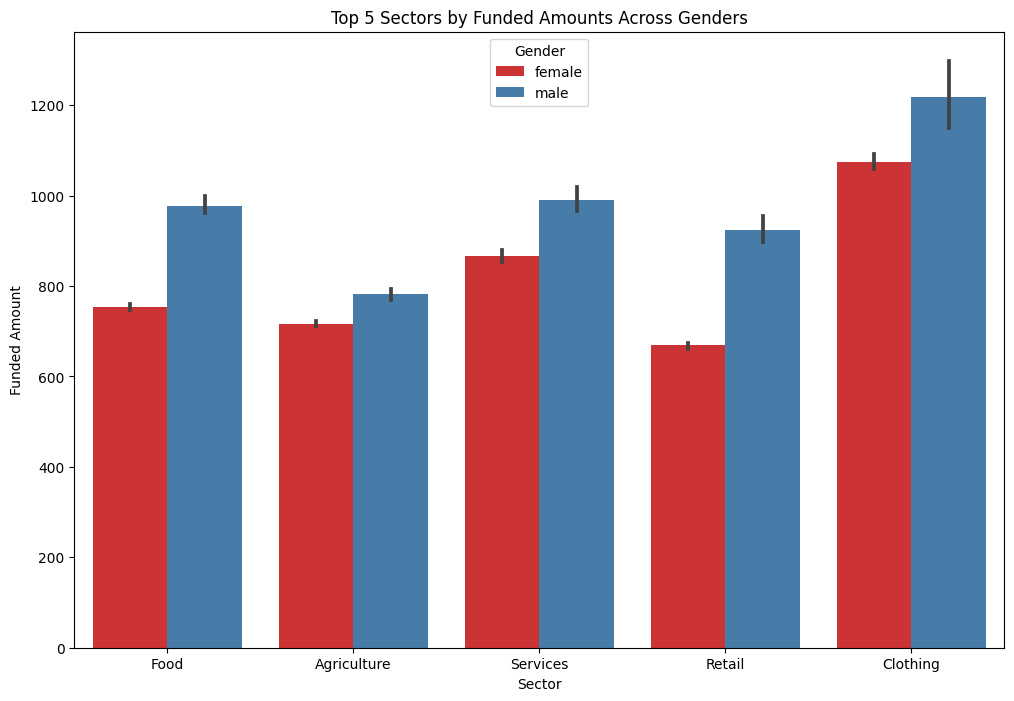

In [25]:

top_sectors = loan_df.groupby('sector')['funded_amount'].sum().nlargest(5).index

# Filter the DataFrame for the top 5 sectors
filtered_df = loan_df[loan_df['sector'].isin(top_sectors)]

plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df, x="sector", y="funded_amount", hue="borrower_genders", palette="Set1")
plt.title("Top 5 Sectors by Funded Amounts Across Genders")
plt.xlabel("Sector")
plt.ylabel("Funded Amount")
plt.legend(title="Gender", loc="upper center")
plt.show()


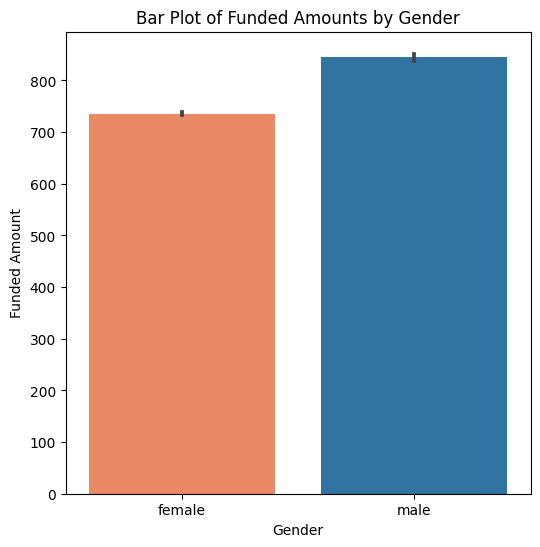

In [27]:

gender_palette = {"female": "#ff7f50", "male": "#1f77b4", "other": "#8c564b"}

plt.figure(figsize=(6, 6))
sns.barplot(data=loan_df, x="borrower_genders", y="funded_amount", palette=gender_palette)
plt.title("Bar Plot of Funded Amounts by Gender")
plt.xlabel("Gender")
plt.ylabel("Funded Amount")
plt.show()




`Region analysis`

In [30]:
location_df = loan_df.groupby('country').agg({'funded_amount': 'sum', 'loan_amount': 'sum'}).reset_index()


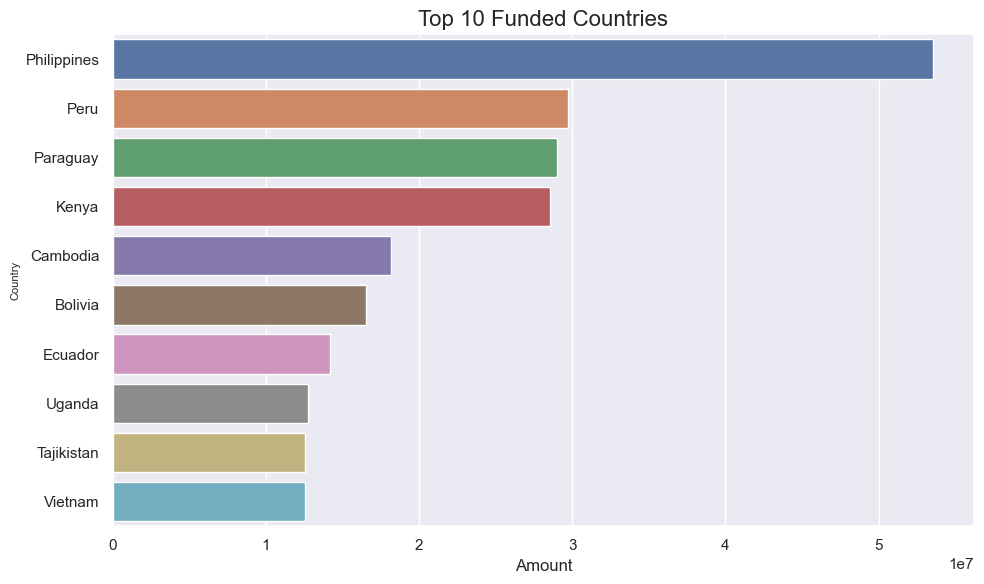

In [52]:
# getting the top 10 funded countries

top_funded = location_df.sort_values(by='funded_amount', ascending=False).head(10)

# Create a Seaborn barplot for the data
plt.figure(figsize=(10, 6))
sns.set()  

custom_palette = sns.color_palette("coolwarm")


ax = sns.barplot(x='funded_amount', y='country', data=top_funded)


# Customize plot labels and titles
plt.title('Top 10 Funded Countries', fontsize=16)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Country', fontsize=8)

# Display the plot
plt.tight_layout()  
plt.show()


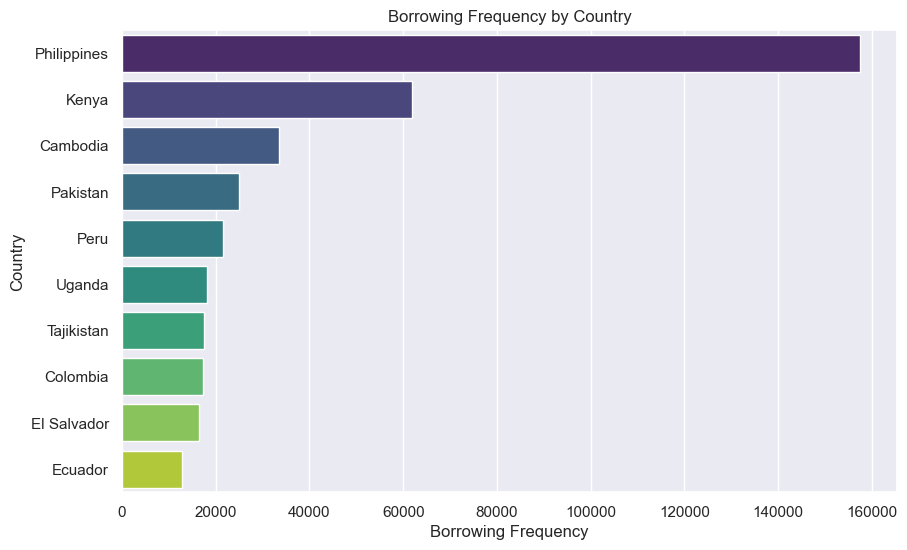

In [47]:
top_10_borrowing_frequency = loan_df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_borrowing_frequency.values, y=top_10_borrowing_frequency.index, palette="viridis")
plt.title("Borrowing Frequency by Country")
plt.xlabel("Borrowing Frequency")
plt.ylabel("Country")
plt.show()

`sector Analysis`

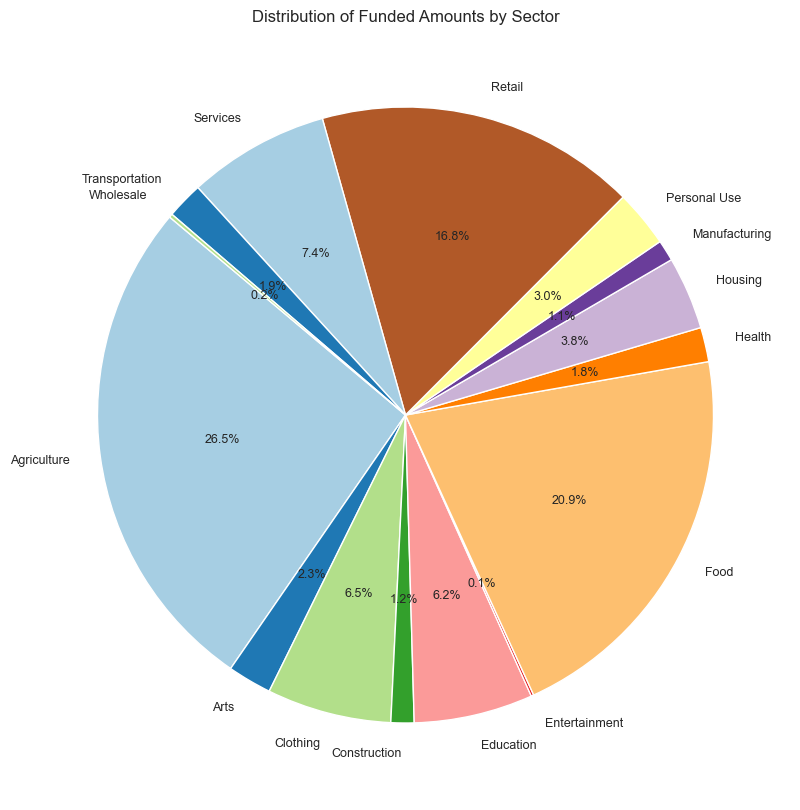

In [63]:
sector_group = loan_df.groupby('sector').agg({'funded_amount': 'sum'}).reset_index()



plt.figure(figsize=(10, 10))
plt.pie(sector_group['funded_amount'], labels=sector_group['sector'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, textprops={'fontsize': 9})
plt.title("Distribution of Funded Amounts by Sector")
plt.show()


`Regression Analysis`

In [80]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Assuming loan_df is your DataFrame
loan_df_encoded = loan_df.copy()  # Create a copy of the DataFrame

# Label encode 'borrower_genders' and 'repayment_interval'
label_encoder = LabelEncoder()
loan_df_encoded['borrower_genders'] = label_encoder.fit_transform(loan_df['borrower_genders'])
loan_df_encoded['repayment_interval'] = label_encoder.fit_transform(loan_df['repayment_interval'])

# Define independent variables and add a constant
X = loan_df_encoded[['term_in_months', 'lender_count', 'borrower_genders', 'repayment_interval']]
X = sm.add_constant(X)

# Define dependent variable
y = loan_df['funded_amount']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print a summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          funded_amount   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                 3.899e+05
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:46:19   Log-Likelihood:            -4.4324e+06
No. Observations:              574115   AIC:                         8.865e+06
Df Residuals:                  574110   BIC:                         8.865e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                260.8613      1


- **Model Fit:**
  - The model explains approximately 73.1% of the variance in 'funded_amount' (R-squared = 0.731). This indicates a moderately strong fit, suggesting that the independent variables collectively contribute to explaining the variability in the dependent variable.

- **Statistical Significance:**
  - The overall model is statistically significant, as indicated by the F-statistic of 3.899e+05 and a very low p-value (Prob (F-statistic) < 0.05). This suggests that the independent variables have a significant impact on 'funded_amount'.

- **Individual Coefficients:**
  
  - 'term_in_months': A one-unit increase in 'term_in_months' is associated with a decrease of 9.0420 in 'funded_amount'.

  - 'lender_count': A one-unit increase in 'lender_count' is associated with an increase of 33.0932 in 'funded_amount'.

  - 'borrower_genders': The presence of a borrower of a different gender is associated with a decrease of 44.8425 in 'funded_amount'. This variable is categorical, and the coefficient represents the average difference compared to the reference category.

  - 'repayment_interval': The presence of a specific repayment interval is associated with a decrease of 26.7738 in 'funded_amount'. As with 'borrower_genders', this variable is categorical.


- **Durbin-Watson Statistic:**
  - The Durbin-Watson statistic is approximately 1.955, suggesting a moderate level of autocorrelation in the residuals.

- **Practical Implications:**
  - 'lender_count' has the largest positive impact on 'funded_amount', suggesting that increasing the number of lenders significantly increases the funded amount.

  - 'term_in_months' has a negative impact, indicating that longer-term loans are associated with lower funded amounts.

  - 'borrower_genders' and 'repayment_interval' are associated with a decrease in funded amount.
